In [ ]:
#Plot3 - Selection Efficiency vs. Wide Adaptation

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import make_interp_spline
#import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\3_Results\AdaptedLinesAndSites\\"
fig_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\6_Plots\\"

In [3]:
from matplotlib.lines import Line2D

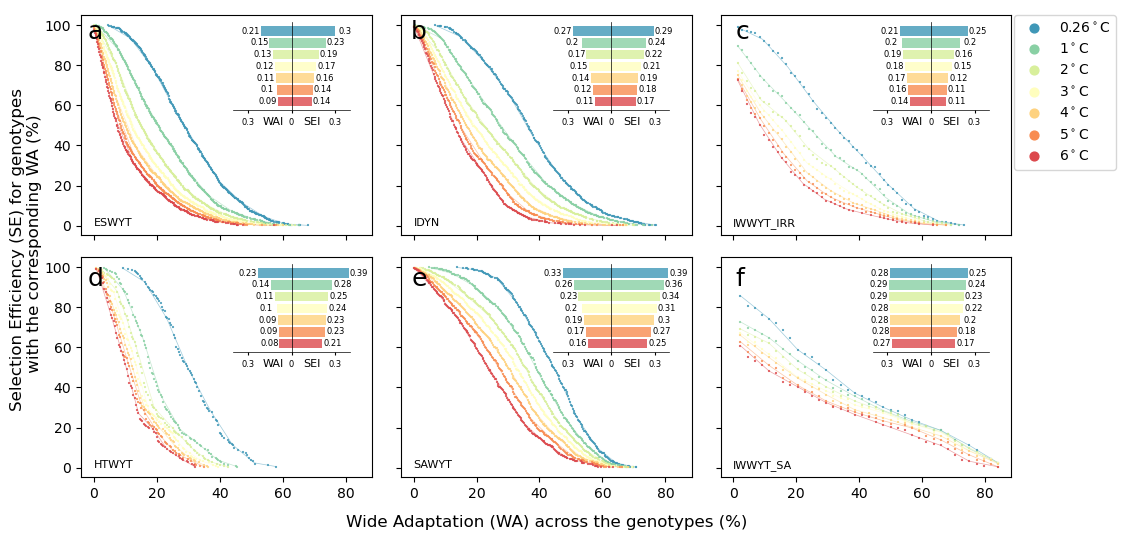

In [34]:
sns.set_style(rc = {'axes.facecolor': 'white'})
nursery=["ESWYT","IDYN","IWWYT_IRR","HTWYT","SAWYT","IWWYT_SA"]
nursery_color0=['purple','blue','green','red','grey','pink']
nursery_color=['Purples','Blues','Greens','Reds','Greys','pink_r']
fitxn=[10,10,10,8,10,10]
xpos=[35,35,30,35,35,30]
warmingsce=[0.26,1,2,3,4,5,6]
fig, ax= plt.subplots(nrows=2,ncols=3,figsize=(12,6),sharex=True,sharey=True)
palette = sns.color_palette("Spectral_r", 7)  #nursery_color[1] huslRdYlGn_r coolwarm RdYlBu_r
for n in range(len(nursery)):
    df=pd.read_csv(data_dir+nursery[n]+"_woco2_Threshold.csv")
    wide_adaptation=[]
    selection=[]
    #palette=["#32A852","#63D07F","#6DB1EE","#1877C9","#C9244C","#D55E86","#87447A"]
    for t in range(7):
        df1=df.iloc[:df.shape[0],1:df.shape[1]].applymap(lambda x: 1 if x>warmingsce[t] else 0)  #give 1 when adapted
        df1['nsite']=df1.sum(axis=1)
        #df1.loc['mean']=df1.mean()
        x=list(set(df1.nsite.tolist())) #sort values
        y=[df1.loc[:,'nsite'].apply(lambda x: 1 if x>i else 0).sum() for i in x]
        df2=pd.DataFrame()
        df2['site']=[100*t/(df.shape[1]-1) for t in x]
        df2['line']=[100*t/(df.shape[0]) for t in y]
        df2=df2[df2>0].dropna()
        #fit line
        x=np.array(df2.site)
        y=np.array(df2.line)
        X_Y_Spline=make_interp_spline(x,y)
        X_=np.linspace(x.min(),x.max(),fitxn[n])
        Y_=X_Y_Spline(X_)
        ax[n//3,n%3].plot(X_,Y_,linewidth=0.5,color=palette[t],zorder=0,alpha=0.5)
        #cross point
        #ax[n//3,n%3].scatter(df2.site,df2.line,s=2,color=palette[t],marker='+',zorder=10,label=str(t)+"$^\circ$C")
        ax[n//3,n%3].scatter(df2.site,df2.line,s=2,color=palette[t],alpha=0.8,marker='+',zorder=10,label=str(warmingsce[t])+"$^\circ$C")
        wide_adaptation=wide_adaptation+[-sum(df2.site*(df2.line/df2.line.sum()))]
        selection=selection+[sum(df2.line*(df2.site/df2.site.sum()))]
    #set fit line and point plot 
    ax[n//3,n%3].text(0,0,nursery[n],fontsize=8)
    #ax[n//3,n%3].text(0,95,chr(97+n),fontsize=15) #nursery name xpos[n] 108
    #for axis in ['left','bottom','right','top']: ax[n//3,n%3].spines[axis].set_linewidth(1)
    #ax[n//3,n%3].tick_params(length=4)
    #ax[n//3,n%3].yaxis.label.set_size(10)
    #ax[n//3,n%3].xaxis.label.set_size(10)
    #if n==2: ax[n//3,n%3].legend(fontsize=9,bbox_to_anchor=(1.29, 0.62, 0.06, 0.4))  #,frameon=False
    #bar plot
    axins = inset_axes(ax[n//3][n%3], width="40%", height="40%", bbox_to_anchor=(0.5,0,1,1),
                       loc='upper left',bbox_transform=ax[n//3][n%3].transAxes)
    y_pos=np.arange(7)
    axins.tick_params(length=2)
    #xpos=[-0.25,-0.15,-0.05,0.05,0.15,0.25]
    width=1
    axins.barh(y_pos,wide_adaptation,color=palette,alpha=0.8)
    axins.barh(y_pos,selection,color=palette,alpha=0.8)
    axins.invert_yaxis()
    axins.spines['left'].set_position(('data', 0))
    axins.spines['left'].set_linewidth(0.5)
    axins.spines['right'].set_visible(False)
    axins.spines['top'].set_visible(False)
    axins.set_xlim([-40,40])
    axins.set_yticks([])
    axins.set_xticks([-30,0,30])
    axins.set_xticklabels([0.3,0,0.3],fontsize=6)
    #axins.spines['bottom'].set_visible(False)
    axins.spines['bottom'].set_linewidth(0.5)
    axins.text(-20,8,'WAI',fontsize=8) #min(wide_adaptation)-28,2.5,
    axins.text(8,8,'SEI',fontsize=8) #max(selection)+12,2.5,
    
    for y in range(7): 
        axins.text(wide_adaptation[y]-7,y_pos[y]+0.2,-round(wide_adaptation[y]/100,2),ha = 'center',fontsize=6)
        axins.text(selection[y]+7,y_pos[y]+0.2,round(selection[y]/100,2),ha='center',fontsize=6)
#Add legend
#palette = sns.color_palette(nursery_color[0], 6)
#handle=[]
#for i in range(6): handle=handle+[mpatches.Patch(color=palette[i], label=str(i+1)+"$^\circ$C")]
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Selection Efficiency (SE) for genotypes \n with the corresponding WA (%)",fontsize=12,labelpad=5)
plt.xlabel("Wide Adaptation (WA) across the genotypes (%)",fontsize=12,labelpad=10)

#Create dummy Line2D objects for legend
h1=[Line2D([0], [0], marker='o', markersize=np.sqrt(10), color=palette[t], linestyle='None') for t in range(7)]
h2=[str(warmingsce[t])+"$^\circ$C" for t in range(7)]
plt.legend(h1, h2, bbox_to_anchor=(1.06, 0.615, 0.06, 0.4), markerscale=2,scatterpoints=1, fontsize=10)
#plt.legend(handles=handle,loc='best',bbox_to_anchor=(1.03, 0.61, 0.05, 0.4),fontsize=8)
    #addlabels(y_pos,wide_adaptation)
    
for n in range(6): plt.gcf().text(0.13+0.27*(n%3),0.84-0.41*(n//3),chr(97+n),fontsize=18)  #chr(65+n)
#plt.gcf().text(0.14,0.42,'b',fontsize=20)
#plt.gcf().text(0.56,0.85,'c',fontsize=20)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
#fig.savefig(fig_dir+'Plot3_WAI-SEI_4N.png',dpi=300,bbox_inches="tight")

In [47]:
nursery=["ESWYT","IDYN","IWWYT_IRR","HTWYT","SAWYT","IWWYT_SA"]
out_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\3_Results\AdaptedLinesAndSites\\"
#fig, ax= plt.subplots(nrows=2,ncols=3,figsize=(9, 5),sharex=True,sharey=True)
    #for t in [1,2,3,4,5,6]:
result=pd.DataFrame(columns=['nursery','warming','index_wide_adaptation','index_selection_efficiency'])
for n in range(len(nursery)):
    df=pd.read_csv(out_dir+nursery[n]+"_woco2_Threshold.csv")
    for t in [0.26,1,2,3,4,5,6]:
        df1=df.iloc[1:df.shape[0],1:df.shape[1]].applymap(lambda x: 1 if x>t else 0)
        df1['nsite']=df1.sum(axis=1)
        #df1.loc['mean']=df1.mean()
        x=list(set(df1.nsite.tolist()))
        y=[df1.loc[:,'nsite'].apply(lambda x: 1 if x>i else 0).sum() for i in x]
        df2=pd.DataFrame()
        df2['site']=[100*t/(df.shape[1]-1) for t in x]
        df2['line']=[100*t/(df.shape[0]-1) for t in y]
        df2=df2[df2>0]
        df2=df2.dropna()
        wide_adaptation=sum(df2.site*(df2.line/df2.line.sum()))
        selection=sum(df2.line*(df2.site/df2.site.sum()))
        result.loc[len(result)]=[nursery[n],t,wide_adaptation,selection]

In [52]:
result[result.warming==0.26]

,nursery,warming,index_wide_adaptation,index_selection_efficiency
0,ESWYT,0.26,21.058213,29.526310
7,IDYN,0.26,26.578895,29.120344
14,IWWYT_IRR,0.26,21.277067,25.150431
21,HTWYT,0.26,23.008136,39.026848
28,SAWYT,0.26,33.397780,39.214794
35,IWWYT_SA,0.26,28.240822,25.342071


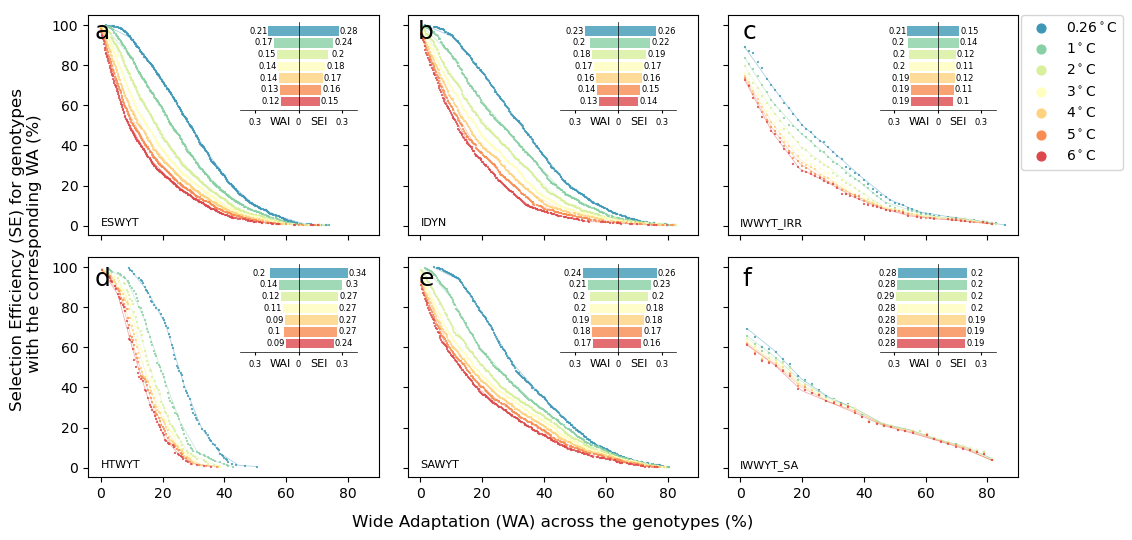

In [35]:
#No Phenology trend
sns.set_style(rc = {'axes.facecolor': 'white'})
nursery=["ESWYT","IDYN","IWWYT_IRR","HTWYT","SAWYT","IWWYT_SA"]
nursery_color0=['purple','blue','green','red','grey','pink']
nursery_color=['Purples','Blues','Greens','Reds','Greys','pink_r']
fitxn=[10,10,10,8,10,10]
xpos=[35,35,30,35,35,30]
warmingsce=[0.26,1,2,3,4,5,6]
fig, ax= plt.subplots(nrows=2,ncols=3,figsize=(12,6),sharex=True,sharey=True)
palette = sns.color_palette("Spectral_r", 7)  #nursery_color[1] huslRdYlGn_r coolwarm RdYlBu_r
for n in range(len(nursery)):
    df=pd.read_csv(data_dir+nursery[n]+"_woco2__nophetrend_Threshold.csv")
    wide_adaptation=[]
    selection=[]
    #palette = sns.color_palette("RdYlGn_r", 7)  #nursery_color[1] husl
    for t in range(7):
        df1=df.iloc[:df.shape[0],1:df.shape[1]].applymap(lambda x: 1 if x>warmingsce[t] else 0)  #give 1 when adapted
        df1['nsite']=df1.sum(axis=1)
        #df1.loc['mean']=df1.mean()
        x=list(set(df1.nsite.tolist())) #sort values
        y=[df1.loc[:,'nsite'].apply(lambda x: 1 if x>i else 0).sum() for i in x]
        df2=pd.DataFrame()
        df2['site']=[100*t/(df.shape[1]-1) for t in x]
        df2['line']=[100*t/(df.shape[0]) for t in y]
        df2=df2[df2>0].dropna()
        #fit line
        x=np.array(df2.site)
        y=np.array(df2.line)
        X_Y_Spline=make_interp_spline(x,y)
        X_=np.linspace(x.min(),x.max(),fitxn[n])
        Y_=X_Y_Spline(X_)
        ax[n//3,n%3].plot(X_,Y_,linewidth=0.5,color=palette[t],zorder=0,alpha=0.5)
        #cross point
        #ax[n//3,n%3].scatter(df2.site,df2.line,s=2,color=palette[t],marker='+',zorder=10,label=str(t)+"$^\circ$C")
        ax[n//3,n%3].scatter(df2.site,df2.line,s=2,color=palette[t],alpha=0.8,marker='+',zorder=10,label=str(warmingsce[t])+"$^\circ$C")
        wide_adaptation=wide_adaptation+[-sum(df2.site*(df2.line/df2.line.sum()))]
        selection=selection+[sum(df2.line*(df2.site/df2.site.sum()))]
    #set fit line and point plot 
    ax[n//3,n%3].text(0,0,nursery[n],fontsize=8)
    #ax[n//3,n%3].text(0,95,chr(97+n),fontsize=15) #nursery name xpos[n] 108
    #for axis in ['left','bottom','right','top']: ax[n//3,n%3].spines[axis].set_linewidth(1)
    #ax[n//3,n%3].tick_params(length=4)
    #ax[n//3,n%3].yaxis.label.set_size(10)
    #ax[n//3,n%3].xaxis.label.set_size(10)
    #if n==2: ax[n//3,n%3].legend(fontsize=9,bbox_to_anchor=(1.29, 0.62, 0.06, 0.4))  #,frameon=False
    #bar plot
    axins = inset_axes(ax[n//3][n%3], width="40%", height="40%", bbox_to_anchor=(0.5,0,1,1),
                       loc='upper left',bbox_transform=ax[n//3][n%3].transAxes)
    y_pos=np.arange(7)
    axins.tick_params(length=2)
    #xpos=[-0.25,-0.15,-0.05,0.05,0.15,0.25]
    width=1
    axins.barh(y_pos,wide_adaptation,color=palette,alpha=0.8)
    axins.barh(y_pos,selection,color=palette,alpha=0.8)
    axins.invert_yaxis()
    axins.spines['left'].set_position(('data', 0))
    axins.spines['left'].set_linewidth(0.5)
    axins.spines['right'].set_visible(False)
    axins.spines['top'].set_visible(False)
    axins.set_xlim([-40,40])
    axins.set_yticks([])
    axins.set_xticks([-30,0,30])
    axins.set_xticklabels([0.3,0,0.3],fontsize=6)
    #axins.spines['bottom'].set_visible(False)
    axins.spines['bottom'].set_linewidth(0.5)
    axins.text(-20,8,'WAI',fontsize=8) #min(wide_adaptation)-28,2.5,
    axins.text(8,8,'SEI',fontsize=8) #max(selection)+12,2.5,
    
    for y in range(7): 
        axins.text(wide_adaptation[y]-7,y_pos[y]+0.2,-round(wide_adaptation[y]/100,2),ha = 'center',fontsize=6)
        axins.text(selection[y]+7,y_pos[y]+0.2,round(selection[y]/100,2),ha='center',fontsize=6)
#Add legend
#palette = sns.color_palette(nursery_color[0], 6)
#handle=[]
#for i in range(6): handle=handle+[mpatches.Patch(color=palette[i], label=str(i+1)+"$^\circ$C")]
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Selection Efficiency (SE) for genotypes \n with the corresponding WA (%)",fontsize=12,labelpad=10)
plt.xlabel("Wide Adaptation (WA) across the genotypes (%)",fontsize=12,labelpad=10)

#Create dummy Line2D objects for legend
h1=[Line2D([0], [0], marker='o', markersize=np.sqrt(10), color=palette[t], linestyle='None') for t in range(7)]
h2=[str(warmingsce[t])+"$^\circ$C" for t in range(7)]
plt.legend(h1, h2, bbox_to_anchor=(1.06, 0.615, 0.06, 0.4), markerscale=2,scatterpoints=1, fontsize=10)
#plt.legend(handles=handle,loc='best',bbox_to_anchor=(1.03, 0.61, 0.05, 0.4),fontsize=8)
    #addlabels(y_pos,wide_adaptation)
    
for n in range(6): plt.gcf().text(0.13+0.27*(n%3),0.84-0.41*(n//3),chr(97+n),fontsize=18)
#plt.gcf().text(0.14,0.42,'b',fontsize=20)
#plt.gcf().text(0.56,0.85,'c',fontsize=20)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.savefig(fig_dir+'Plot_S_WAI-SEI_NoPheTrend_4N.png',dpi=300,bbox_inches="tight")

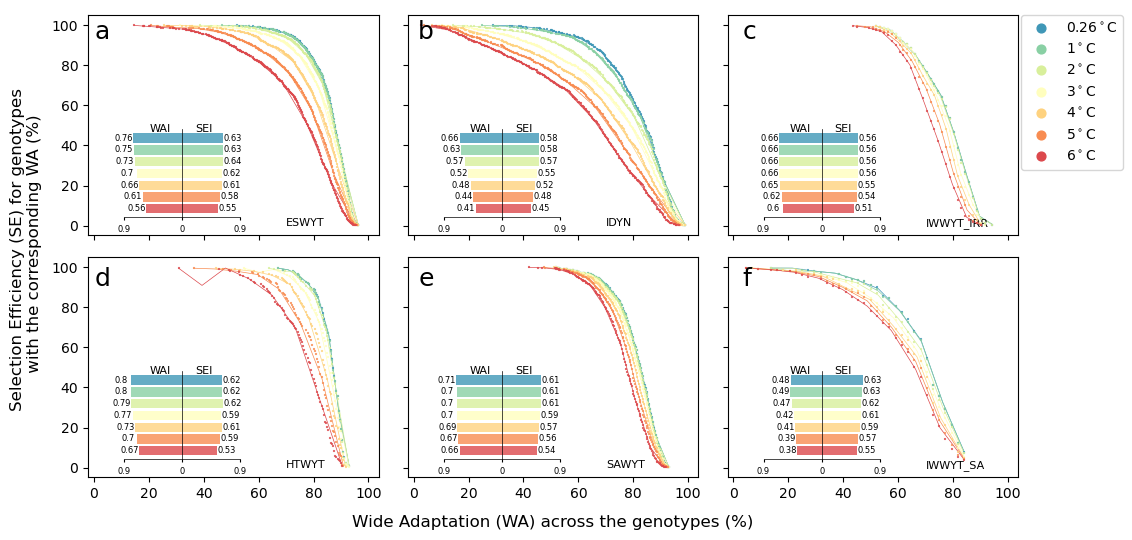

In [37]:
#WCO2
sns.set_style(rc = {'axes.facecolor': 'white'})
nursery=["ESWYT","IDYN","IWWYT_IRR","HTWYT","SAWYT","IWWYT_SA"]
nursery_color0=['purple','blue','green','red','grey','pink']
nursery_color=['Purples','Blues','Greens','Reds','Greys','pink_r']
fitxn=[10,10,10,8,10,10]
xpos=[35,35,30,35,35,30]
warmingsce=[0.26,1,2,3,4,5,6]
fig, ax= plt.subplots(nrows=2,ncols=3,figsize=(12,6),sharex=True,sharey=True)
palette = sns.color_palette("Spectral_r", 7)  #nursery_color[1] huslRdYlGn_r coolwarm RdYlBu_r
for n in range(len(nursery)):
    df=pd.read_csv(data_dir+nursery[n]+"_wco2_Threshold.csv")
    wide_adaptation=[]
    selection=[]
    #palette = sns.color_palette("RdYlGn_r", 7)  #nursery_color[1] husl
    for t in range(7):
        df1=df.iloc[:df.shape[0],1:df.shape[1]].applymap(lambda x: 1 if x>warmingsce[t] else 0)  #give 1 when adapted
        df1['nsite']=df1.sum(axis=1)
        #df1.loc['mean']=df1.mean()
        x=list(set(df1.nsite.tolist())) #sort values
        y=[df1.loc[:,'nsite'].apply(lambda x: 1 if x>i else 0).sum() for i in x]
        df2=pd.DataFrame()
        df2['site']=[100*t/(df.shape[1]-1) for t in x]
        df2['line']=[100*t/(df.shape[0]) for t in y]
        df2=df2[df2>0].dropna()
        df2=df2.sort_values(by=['site'])
        #fit line
        x=np.array(df2.site)
        y=np.array(df2.line)
        X_Y_Spline=make_interp_spline(x,y)
        X_=np.linspace(x.min(),x.max(),fitxn[n])
        Y_=X_Y_Spline(X_)
        ax[n//3,n%3].plot(X_,Y_,linewidth=0.5,color=palette[t],zorder=0)
        #cross point
        #ax[n//3,n%3].scatter(df2.site,df2.line,s=2,color=palette[t],marker='+',zorder=10,label=str(t)+"$^\circ$C")
        ax[n//3,n%3].scatter(df2.site,df2.line,s=2,color=palette[t],alpha=0.8,marker='+',zorder=10,label=str(warmingsce[t])+"$^\circ$C")
        wide_adaptation=wide_adaptation+[-sum(df2.site*(df2.line/df2.line.sum()))]
        selection=selection+[sum(df2.line*(df2.site/df2.site.sum()))]
    #set fit line and point plot 
    ax[n//3,n%3].text(70,0,nursery[n],fontsize=8) #nursery name
    #for axis in ['left','bottom','right','top']: ax[n//3,n%3].spines[axis].set_linewidth(1)
    #ax[n//3,n%3].tick_params(length=4)
    #ax[n//3,n%3].yaxis.label.set_size(10)
    #ax[n//3,n%3].xaxis.label.set_size(10)
    #if n==2: ax[n//3,n%3].legend(fontsize=9,bbox_to_anchor=(1.29, 0.62, 0.06, 0.4))  #,frameon=False
    #bar plot
    axins = inset_axes(ax[n//3][n%3], width="40%", height="40%", bbox_to_anchor=(0.1,0.05,1,1),
                       loc='lower left',bbox_transform=ax[n//3][n%3].transAxes)
    y_pos=np.arange(7)
    axins.tick_params(length=2)
    #xpos=[-0.25,-0.15,-0.05,0.05,0.15,0.25]
    width=1
    axins.barh(y_pos,wide_adaptation,color=palette,alpha=0.8)
    axins.barh(y_pos,selection,color=palette,alpha=0.8)
    axins.invert_yaxis()
    axins.spines['left'].set_position(('data', 0))
    axins.spines['left'].set_linewidth(0.5)
    axins.spines['right'].set_visible(False)
    axins.spines['top'].set_visible(False)
    axins.set_xlim([-90,90])
    axins.set_yticks([])
    axins.set_xticks([-90,0,90])
    axins.set_xticklabels([0.9,0,0.9],fontsize=6)
    #axins.spines['bottom'].set_visible(False)
    axins.spines['bottom'].set_linewidth(0.5)
    axins.text(-50,-0.5,'WAI',fontsize=8) #min(wide_adaptation)-28,2.5,
    axins.text(20,-0.5,'SEI',fontsize=8) #max(selection)+12,2.5
    
    for y in range(7): 
        axins.text(wide_adaptation[y]-15,y_pos[y]+0.2,-round(wide_adaptation[y]/100,2),ha = 'center',fontsize=6)
        axins.text(selection[y]+15,y_pos[y]+0.2,round(selection[y]/100,2),ha='center',fontsize=6)
#Add legend
#palette = sns.color_palette(nursery_color[0], 6)
#handle=[]
#for i in range(6): handle=handle+[mpatches.Patch(color=palette[i], label=str(i+1)+"$^\circ$C")]
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Selection Efficiency (SE) for genotypes \n with the corresponding WA (%)",fontsize=12,labelpad=10)
plt.xlabel("Wide Adaptation (WA) across the genotypes (%)",fontsize=12,labelpad=10)

#Create dummy Line2D objects for legend
h1=[Line2D([0], [0], marker='o', markersize=np.sqrt(10), color=palette[t], linestyle='None') for t in range(7)]
h2=[str(warmingsce[t])+"$^\circ$C" for t in range(7)]
plt.legend(h1, h2, bbox_to_anchor=(1.06, 0.615, 0.06, 0.4), markerscale=2,scatterpoints=1, fontsize=10)
#plt.legend(handles=handle,loc='best',bbox_to_anchor=(1.03, 0.61, 0.05, 0.4),fontsize=8)
    #addlabels(y_pos,wide_adaptation)
for n in range(6): plt.gcf().text(0.13+0.27*(n%3),0.84-0.41*(n//3),chr(97+n),fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.savefig(fig_dir+'Plot_S_WAI-SEI_wco2_4N.png',dpi=300,bbox_inches="tight")
#plt.legend()